# **European Soccer Data Analysis in seasons 2008 : 2016**

# **Table of Contents**
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# **Introduction**

> In this project i gathered data from **[kaggle](https://www.kaggle.com/hugomathien/soccer)** and it is mysql data file that has data of:
>
> +25,000 matches.\
> +10,000 players.\
> 11 European Countries with their lead championship.\
> Seasons 2008 to 2016.\
> Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates.
>
>
> And in this project we will discover these data to help us answer some curious questions. personally, I am interested in discovering them.
>
>

> ##### **Questions I will focus on in this analysis:**
>1. What are the best Leagues with maximum number of goals per year ?
>2. What are the best teams with the highest rate of winning matches?
>3. What helps the best teams to win? In other words, what sets the best teams apart from the rest?
>4. How teams' interest in defence has changed ?
>5. Who are the best players of each year?
>6. What features affects the overall rating of players?







In [94]:
# importing lybraries used in the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

<a id='wrangling'></a>
# **Data Wrangling**

In [95]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

con = sqlite3.connect('database.sqlite')
country = pd.read_sql_query('SELECT * FROM Country', con)
league  = pd.read_sql_query('SELECT * FROM League', con)
match   = pd.read_sql_query('SELECT * FROM Match', con)
player  = pd.read_sql_query('SELECT * FROM Player', con)
player_att = pd.read_sql_query('SELECT * FROM Player_Attributes', con)
team = pd.read_sql_query('SELECT * FROM Team', con)
team_att = pd.read_sql_query('SELECT * FROM Team_Attributes', con)

# to display all columns of the DataFrame.
pd.set_option("display.max_columns", None)


## **Data Assessing** :

>#### country dataset :

In [97]:
print(country.head(), '\n\n')

print('null values: ', country.id.isnull().sum())
print('duplicated data: ', country.id.duplicated().sum())

      id     name
0      1  Belgium
1   1729  England
2   4769   France
3   7809  Germany
4  10257    Italy 


null values:  0
duplicated data:  0


In [99]:
# view on the country table
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [100]:
# trying to know what are the unique values: 
if match.id.duplicated().sum() == 0: 
    print('[ id ] column is unique')
else: 
    print('[ id ] column is NOT unique.')

[ id ] column is unique


> #### league dataset :


In [101]:
# exploring league dataset.
print(league.head(), '\n\n')

print('null values: ', league.id.isnull().sum())
print('duplicated data: ', league.id.duplicated().sum())

      id  country_id                    name
0      1           1  Belgium Jupiler League
1   1729        1729  England Premier League
2   4769        4769          France Ligue 1
3   7809        7809   Germany 1. Bundesliga
4  10257       10257           Italy Serie A 


null values:  0
duplicated data:  0


In [102]:
# view on league dataset.
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [103]:
# trying to know what are the unique values: 
if  league.id.duplicated().sum() == 0: 
    print('[ id ] column is unique')
else: 
    print('[ id ] column is NOT unique.')

[ id ] column is unique


> #### match dataset :
    


In [104]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 6)

# exploring data of the matches to check if there is duplicates, nan values.
print(match.head(), '\n\n')

print('null values: ', match.isnull().sum().sum())
print('duplicated data: ', match.duplicated().sum())

   id  country_id  league_id  ...   BSH   BSD   BSA
0   1           1          1  ...  1.73  3.40  4.20
1   2           1          1  ...  1.91  3.25  3.60
2   3           1          1  ...  2.30  3.20  2.75
3   4           1          1  ...  1.44  3.75  6.50
4   5           1          1  ...  4.75  3.30  1.67

[5 rows x 115 columns] 


null values:  407395
duplicated data:  0


In [105]:
match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [106]:
# trying to know what are the unique values: 
if match.match_api_id.duplicated().sum() == 0: 
    print('[ match_api_id ] column is unique')
else: 
    print('[ match_api_id ] column is NOT unique.')

[ match_api_id ] column is unique


> #### player dataset :

In [107]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 5)

# exploring match dataset.
print(player.head(), '\n\n')

print('null values: ', player.player_api_id.isnull().sum())
print('duplicated data: ', player.player_api_id.duplicated().sum())

   id  player_api_id  ...  height  weight
0   1         505942  ...  182.88     187
1   2         155782  ...  170.18     146
2   3         162549  ...  170.18     163
3   4          30572  ...  182.88     198
4   5          23780  ...  182.88     154

[5 rows x 7 columns] 


null values:  0
duplicated data:  0


In [108]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [109]:
# trying to know what are the unique values: 
if player.player_api_id.duplicated().sum() == 0: 
    print('[ player_api_id ] column is unique')
else: 
    print('[ player_api_id ] column is NOT unique.')

[ player_api_id ] column is unique


> #### player_attributes dataset : 

In [110]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 5)

# exploring data of the matches to check if there is duplicates, nan values.
print(player_att.head(), '\n\n')

print('null values: ', player_att.isnull().sum().sum())
print('duplicated data: ', player_att.duplicated().sum())    

   id  player_fifa_api_id  ...  gk_positioning gk_reflexes
0   1              218353  ...             8.0         8.0
1   2              218353  ...             8.0         8.0
2   3              218353  ...             8.0         8.0
3   4              218353  ...             7.0         7.0
4   5              218353  ...             7.0         7.0

[5 rows x 42 columns] 


null values:  47301
duplicated data:  0


In [111]:
player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

> #### team dataset :

In [112]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", None)

# exploring data of the matches to check if there is duplicates, nan values.
print(team.head(), '\n\n')

print('null values: ', team.isnull().sum().sum())
print('duplicated data: ', team.duplicated().sum())    

   id  team_api_id  team_fifa_api_id     team_long_name team_short_name
0   1         9987             673.0           KRC Genk             GEN
1   2         9993             675.0       Beerschot AC             BAC
2   3        10000           15005.0   SV Zulte-Waregem             ZUL
3   4         9994            2007.0   Sporting Lokeren             LOK
4   5         9984            1750.0  KSV Cercle Brugge             CEB 


null values:  11
duplicated data:  0


In [113]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


> #### team_attributes dataset :

In [114]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 0)

# exploring data of the matches to check if there is duplicates, nan values.
print(team_att.head(), '\n\n')

print('null values: ', team_att.isnull().sum().sum())
print('duplicated data: ', team_att.duplicated().sum())    

   id  team_fifa_api_id  team_api_id  ... defenceTeamWidth  defenceTeamWidthClass defenceDefenderLineClass
0   1               434         9930  ...               45                 Normal                    Cover
1   2               434         9930  ...               54                 Normal                    Cover
2   3               434         9930  ...               54                 Normal                    Cover
3   4                77         8485  ...               70                   Wide                    Cover
4   5                77         8485  ...               52                 Normal                    Cover

[5 rows x 25 columns] 


null values:  969
duplicated data:  0


In [115]:
# trying to know what are the unique values: 
if team.team_api_id.duplicated().sum() == 0: 
    print('[ team_api_id ] column is unique')
else: 
    print('[ team_api_id ] column is NOT unique.')

[ team_api_id ] column is unique


## Conclusion Of Assessing

##### Country dataset conclusion: 
> 11 rows, 2 columns.\
> No null values.  
> No duplicated rows.

> [ **id** ] column is unique ... we can use it in relations between tables.


##### league dataset conclusion: 
> 11 rows, 3 columns.\
> No null values.  
> No duplicated rows.


> [ **id** ] column is unique.

##### match dataset conclusion: 
> 25979 rows, 115 columns.\
> null values => 407395. ---- but all of them in columns we will not use.\
> duplicated rows => 0


>**Need to be cleaned**

> **[match_api_id]** is unique.
    


##### player dataset conclusion: 
> 11060 rows, 7 columns.\
> null values => 0\
> duplicated rows => 0

> **Need to change dtypes**

> [ **player_api_id** ] is unique

##### player_att dataset conclusion: 
> 183978 rows, 42 columns.\
> null values => 47301\
> duplicated rows => 0

> **Need to be cleaned**

> No need for unique values as each player has more than one statistics all over the years.

##### team dataset conclusion: 
> 299 rows, 5 columns.\
> null values => 11 ---- but all of them from one column 'team_fifa_api_id'. 
>
> duplicated rows => 0


> **Need to be cleaned**

> [ **team_api_id** ] is unique

##### team_att dataset conclusion: 
> 1458 rows, 25 columns.\
> null values => 969 --- from one column 'buildUpPlayDribbling' so i prefer to delete it.
>
> duplicated rows => 0


> **Need to be cleaned**

> No need for unique values as each team has more than one statistics all over the years.




## **Data Cleaning**

#### Cleaning 'match' dataset :

In [116]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [117]:
# get rid of columns that have null values and we will not use them: 
match = match.loc[:, :'away_team_goal']

In [118]:
# insuring that the data has no null now. 
print('number of null values now: ', match.isnull().sum().sum())

number of null values now:  0


In [119]:
# checking all dtyeps are good or not.
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   stage             25979 non-null  int64 
 5   date              25979 non-null  object
 6   match_api_id      25979 non-null  int64 
 7   home_team_api_id  25979 non-null  int64 
 8   away_team_api_id  25979 non-null  int64 
 9   home_team_goal    25979 non-null  int64 
 10  away_team_goal    25979 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


In [120]:
# the country_id is the same for the league_id
(match.country_id == match.league_id).all()

True

In [121]:
# so we will drop the country_id
match.drop(columns=['country_id'], inplace=True)

In [122]:
# converting data in the 'date' column from object => datetime.
match['date'] = pd.to_datetime(match['date'])

In [123]:
# making a new column named 'Year' to use it to group data by the year or the season.
match['Year'] = pd.DatetimeIndex(match['date']).year

Text(0, 0.5, 'Number of matches')

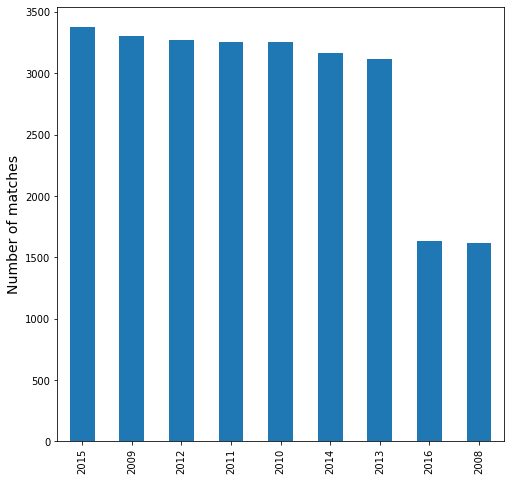

In [124]:
match.Year.value_counts().plot(kind='bar', figsize=(8, 8))
plt.ylabel('Number of matches', fontsize=14)

> Notice the data should be consistant with all dataframes, if we check the data in [team_att] dataframe\
> we will found that there is no data for 2008, 2009, 2015 teams.

> #### So our analysis of matches and teams will be by calculating the mean in the most cases.


In [125]:
match.head(2)

,id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Year
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2008
1,2,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,2008


#### Cleaning 'player' dataset :

In [126]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [127]:
# we need to change data type of birthday column form object to date time.
player['birthday'] = pd.to_datetime(player['birthday'])
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  float64       
 6   weight              11060 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 605.0+ KB


##### Distribution of ages of the players:

In [128]:
# adding a new column named 'Age' to show the distribution of the ages.
player['Age'] = pd.datetime.now().year - pd.DatetimeIndex(player['birthday']).year

C:\Users\zmlka\AppData\Local\Temp\ipykernel_14700\792103763.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  player['Age'] = pd.datetime.now().year - pd.DatetimeIndex(player['birthday']).year


Text(0, 0.5, 'No of players')

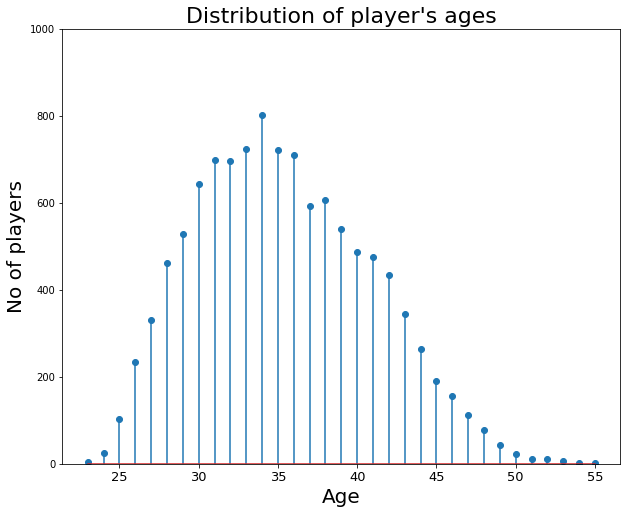

In [129]:
ide = sorted(player.Age.value_counts().index)
Data = player.Age.value_counts()[ide]
plt.subplots(figsize=(10, 8))
plt.stem(Data.index, Data.values, use_line_collection=True)
plt.ylim(0, 1000)
plt.xticks(fontsize=13)
plt.xlabel('Age', fontsize=20)
plt.title("Distribution of player's ages", fontsize= 22)
plt.ylabel('No of players', fontsize=20)


The figure shows that the age curve is a normal distribution curve, so the average age of the players is 35 years.

#### Cleaning 'player_att' dataset :

In [130]:
player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [131]:
# we will drop all players who has null values in their attributes.
player_att.dropna(inplace=True)

In [132]:
# check if there is null values: 
print('number of null values now: ', player_att.isnull().any().sum());

number of null values now:  0


In [133]:
# we need to change data type of [date] column form object to date time.
player_att['date'] = pd.to_datetime(player_att['date'])

# and making a column [Year] of data.
player_att['Year'] = pd.DatetimeIndex(player_att['date']).year
player_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   180354 non-null  int64         
 1   player_fifa_api_id   180354 non-null  int64         
 2   player_api_id        180354 non-null  int64         
 3   date                 180354 non-null  datetime64[ns]
 4   overall_rating       180354 non-null  float64       
 5   potential            180354 non-null  float64       
 6   preferred_foot       180354 non-null  object        
 7   attacking_work_rate  180354 non-null  object        
 8   defensive_work_rate  180354 non-null  object        
 9   crossing             180354 non-null  float64       
 10  finishing            180354 non-null  float64       
 11  heading_accuracy     180354 non-null  float64       
 12  short_passing        180354 non-null  float64       
 13  volleys       

#### Cleaning 'team' dataset :

In [134]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [135]:
# droping all rows that contain null values (11 value)
team.dropna(inplace=True)

In [136]:
# check if there is null values: 
print('number of null values now: ', team.isnull().any().sum());

number of null values now:  0


#### Cleaning 'team_att' dataset :

In [137]:
team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [138]:
# i'd like to drop the column itself 'which contains all null values' as i wont use it.
team_att.drop(columns = 'buildUpPlayDribbling', inplace=True)

In [139]:
# cheacking for other null values:
print('Number of null values now: ', team_att.isnull().sum().sum())

Number of null values now:  0


In [140]:
team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              1458 non-null   int64 
 1   team_fifa_api_id                1458 non-null   int64 
 2   team_api_id                     1458 non-null   int64 
 3   date                            1458 non-null   object
 4   buildUpPlaySpeed                1458 non-null   int64 
 5   buildUpPlaySpeedClass           1458 non-null   object
 6   buildUpPlayDribblingClass       1458 non-null   object
 7   buildUpPlayPassing              1458 non-null   int64 
 8   buildUpPlayPassingClass         1458 non-null   object
 9   buildUpPlayPositioningClass     1458 non-null   object
 10  chanceCreationPassing           1458 non-null   int64 
 11  chanceCreationPassingClass      1458 non-null   object
 12  chanceCreationCrossing          1458 non-null   

In [141]:
# changing the dtype of the column [date] from object to date time.
# and making a column with the name 'Year'.

team_att['date'] = pd.to_datetime(team_att['date'])
team_att['Year'] = pd.DatetimeIndex(team_att['date']).year

#### Merging "Player" with "Player_att" datasets, to put players' information with his stats into one dataset "PlayerData".

In [142]:
print('Columns of [player] are:', '\n' , list(player.columns), '\n');
print('Columns of [player_att] are:', '\n' , list(player_att.columns), '\n');

Columns of [player] are: 
 ['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday', 'height', 'weight', 'Age'] 

Columns of [player_att] are: 
 ['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'Year'] 



In [143]:
PlayerData = pd.merge(left=player, right=player_att, on=['player_api_id'])
PlayerData.head(2)

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,Age,id_y,player_fifa_api_id_y,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Year
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,30,1,218353,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,30,2,218353,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015


In [144]:
# droping not important columns in the new DataFrame.
# deleting the [player] and [player_att] dataframes, as there is no need for them now.

try:
    PlayerData.drop(columns=['id_x', 'id_y', 'player_api_id', 'player_fifa_api_id_x', 'player_fifa_api_id_y', 'birthday'], inplace=True)
    del player
    del player_att
except:
    print('already these columns were dropped!')
    


#### Merging "team" with "team_att" datasets, to put teams' information with their stats into one dataset "TeamData".

In [145]:
print('Columns of [team] are:', '\n' , list(team.columns), '\n');
print('Columns of [team_att] are:', '\n' , list(team_att.columns), '\n');

Columns of [team] are: 
 ['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name', 'team_short_name'] 

Columns of [team_att] are: 
 ['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass', 'buildUpPlayPassing', 'buildUpPlayPassingClass', 'buildUpPlayPositioningClass', 'chanceCreationPassing', 'chanceCreationPassingClass', 'chanceCreationCrossing', 'chanceCreationCrossingClass', 'chanceCreationShooting', 'chanceCreationShootingClass', 'chanceCreationPositioningClass', 'defencePressure', 'defencePressureClass', 'defenceAggression', 'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass', 'Year'] 



In [146]:
TeamData = pd.merge(left=team, right=team_att, on=['team_api_id'])
TeamData.head(2)

,id_x,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,Year
0,1,9987,673.0,KRC Genk,GEN,485,673,2010-02-22,45,Balanced,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,2010
1,1,9987,673.0,KRC Genk,GEN,486,673,2011-02-22,66,Balanced,Little,52,Mixed,Organised,65,Normal,66,Normal,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap,2011


In [147]:
# droping not important columns in the new DataFrame.
# deleting the team and team_att datasets as no need for them now.
try:
    TeamData.drop(columns=['id_x', 'date', 'id_y', 'team_fifa_api_id_x', 'team_fifa_api_id_y'], inplace=True)
    del team
    del team_att
except:
    print('already these columns were dropped!')

In [148]:
TeamData.head(2)

,team_api_id,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,Year
0,9987,KRC Genk,GEN,45,Balanced,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,2010
1,9987,KRC Genk,GEN,66,Balanced,Little,52,Mixed,Organised,65,Normal,66,Normal,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap,2011


#### Merging "league" with "country" datasets, to put them into one dataset "LeagueCoun".

In [149]:
print('Columns of [league] are:', '\n' , list(league.columns), '\n');
print('Columns of [country] are:', '\n' , list(country.columns), '\n');

Columns of [league] are: 
 ['id', 'country_id', 'name'] 

Columns of [country] are: 
 ['id', 'name'] 



In [150]:
LeagueCoun = pd.merge(left=league, right=country, left_on='country_id', right_on='id')
LeagueCoun.head()

,id_x,country_id,name_x,id_y,name_y
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy


In [151]:
# droping not important columns in the new DataFrame.
# deleting the [league] and [country] datasets as no need for them now.

# we notice that all country_ids is the same for their league_ids 
try:
    LeagueCoun.drop(columns=['id_y', 'country_id'], inplace=True)
    del league
    del country
except:
    print('already these columns were dropped!')

In [152]:
# renaming columns 
LeagueCoun.rename(columns={'id_x': 'league_id', 'name_x': 'league_name', 'name_y': 'country_name'}, inplace=True)

In [153]:
LeagueCoun

,league_id,league_name,country_name
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


#### Merging "LeagueCoun" with "match" datasets, to put matchs' information with their leagues into one dataset "Match_League_Country".

In [154]:
print('Columns of [LeagueCoun] are:', '\n' , list(LeagueCoun.columns), '\n');
print('Columns of [match] are:', '\n' , list(match.columns), '\n');

Columns of [LeagueCoun] are: 
 ['league_id', 'league_name', 'country_name'] 

Columns of [match] are: 
 ['id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'Year'] 



In [155]:
Match_League_Country = pd.merge(left=match, right=LeagueCoun, on='league_id')
Match_League_Country.head(2)

,id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Year,league_name,country_name
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2008,Belgium Jupiler League,Belgium
1,2,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,2008,Belgium Jupiler League,Belgium


In [156]:
# droping not important columns in the new DataFrame.
# deleting the [LeagueCoun] as we don't need it now after constructing [Match_League_Country]

# we notice that all country_ids is the same for their league_ids 
try:
    Match_League_Country.drop(columns=['id', 'league_id'], inplace=True)
    del LeagueCoun
except:
    print('already these columns were dropped!')


In [157]:
# making a new column [Total_goals].
Match_League_Country['Total_goals'] = Match_League_Country.home_team_goal + Match_League_Country.away_team_goal

In [158]:
Match_League_Country.head(2)

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Year,league_name,country_name,Total_goals
0,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2008,Belgium Jupiler League,Belgium,2
1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,2008,Belgium Jupiler League,Belgium,0


### Our final data tables which we have and will use: 

In [159]:
PlayerData.head(1)

,player_name,height,weight,Age,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Year
0,Aaron Appindangoye,182.88,187,30,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016


In [160]:
TeamData.head(1)

,team_api_id,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,Year
0,9987,KRC Genk,GEN,45,Balanced,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,2010


In [161]:
Match_League_Country.head(1)

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Year,league_name,country_name,Total_goals
0,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2008,Belgium Jupiler League,Belgium,2


<a id='eda'></a>
# **Exploratory Data Analysis**



### 1) What are the best Leagues with maximum number of goals per year ?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


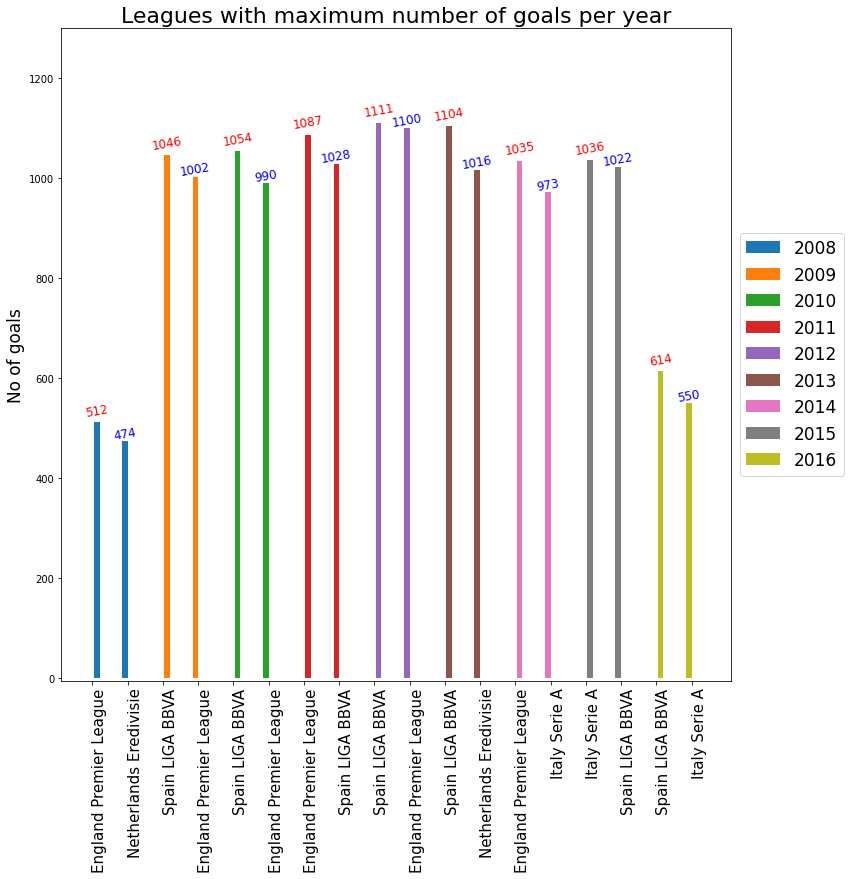

In [162]:
leagus_total_goals = Match_League_Country.groupby(['Year', 'league_name']).sum()
df = {}
years = np.arange(2008, 2017)

# making a dicitonary saves the most 2 leagues has goals in each ear.
for i in range(len(years)):
    df[years[i]] = leagus_total_goals.query(f'Year == {years[i]}')['Total_goals'].nlargest(2)



fig, ax = plt.subplots(figsize=(12, 12))
x = 0
# plotting bars
for year in years:
    plt.bar(np.arange(0, 8, 4) + x ,df[year].values)
    
    # typing each maximum goal for each league
    plt.text(0 + x, df[year].values[0] + 7 , df[year].values[0], ha='center', va='bottom' , fontsize=12,  color='r', rotation='10')
    plt.text(4 + x, df[year].values[1] - 2  ,df[year].values[1], ha='center', va='bottom',fontsize=12, color='b', rotation='10')

    # splitting betweeen the years
    x += 10


# getting the names of the leagues to use it in plt.xlabels of plt.set_xticks.
names = []
for i in range(len(years)):
    names.append(df[years[i]].index[0][1])
    names.append(df[years[i]].index[1][1])

# typing on the x-axis
ax.set_ylabel('No of goals', fontsize=17)
ax.set_title('Leagues with maximum number of goals per year', fontsize=22)
ax.set_xticks(np.arange(0, 180/2, 5) - 0.6  ,names, rotation=90,minor=False,ha='left', fontsize=15)

ax.legend()
plt.xlim(-5, 90)
plt.ylim(-5, 1300)
plt.legend(np.arange(2008, 2017), loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, prop={'size': 17})


> ##### We note that the 3 most popular leagues in the list of the most scoring leagues are
> 1. **Spain LIGA BBVA.**
> 2. **England Premier League.**
> 3. Italy Serie A.

> ##### This explains why the Spanish and English leagues are the most watched in the world.

> ##### But to be fair, the number of matches varies from one league to another, so let's calculate the **average goals per match** in the leagues over the years:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


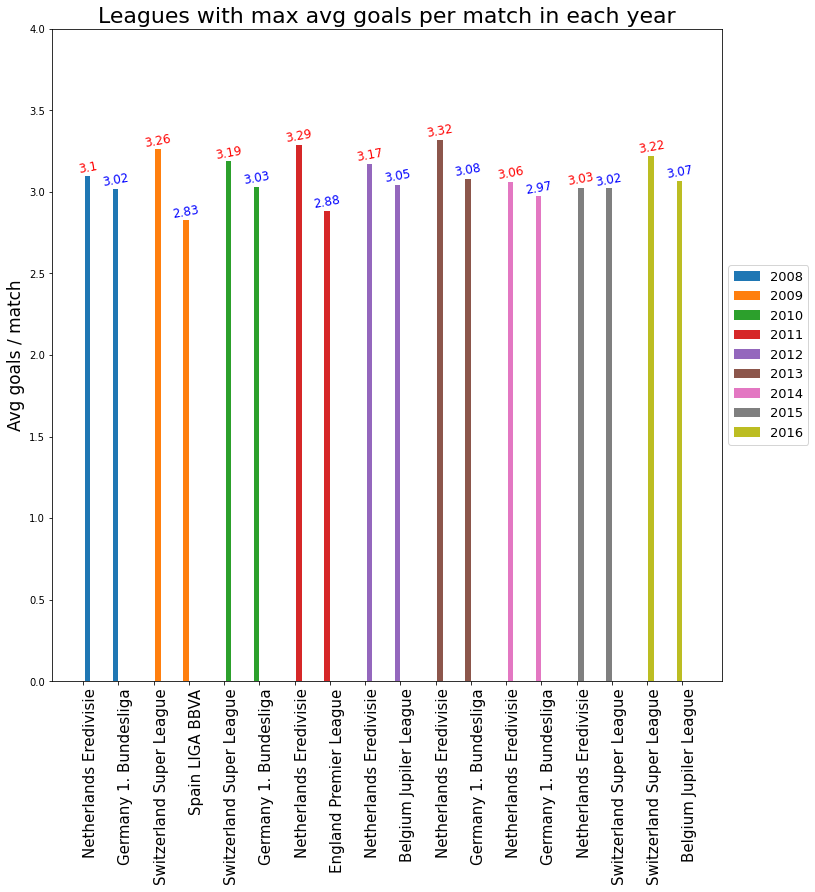

In [166]:
leagus_avg_goals = Match_League_Country.groupby(['Year', 'league_name']).mean()
df = {}
years = np.arange(2008, 2017)

# making a dicitonary saves the most 2 leagues has goals in each ear.
for i in range(len(years)):
    df[years[i]] = leagus_avg_goals.query(f'Year == {years[i]}')['Total_goals'].nlargest(2)



fig, ax = plt.subplots(figsize=(12, 12))
x = 0
# plotting bars
for year in years:
    plt.bar(np.arange(0, 8, 4) + x ,df[year].values)
    
    # typing each maximum goal for each league
    plt.text(0 + x, df[year].values[0] , round(df[year].values[0], 2), ha='center', va='bottom' , fontsize=12,  color='r', rotation='10')
    plt.text(4 + x, df[year].values[1] , round(df[year].values[1], 2), ha='center', va='bottom',fontsize=12, color='b', rotation='10')

    # splitting betweeen the years
    x += 10


# getting the names of the leagues to use it in plt.xlabels of plt.set_xticks.
names = []
for i in range(len(years)):
    names.append(df[years[i]].index[0][1])
    names.append(df[years[i]].index[1][1])

# typing on the x-axis
ax.set_ylabel('Avg goals / match', fontsize=17)
ax.set_title('Leagues with max avg goals per match in each year', fontsize=22)
ax.set_xticks(np.arange(0, 180/2, 5) - 0.6  ,names, rotation=90,minor=False,ha='left', fontsize=15)

ax.legend()
plt.xlim(-5, 90)
plt.ylim(0, 4)
plt.legend(np.arange(2008, 2017), loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, prop={'size': 13})


> ##### As we expected, the number of matches varies from one league to another, and this shows that the leagues that have the highest average number of goals in each match are:
> 1. **Netherlands Eredivisie.**
> 2. **Switzerland Super League.**
> 3. Germany 1. Bundesliga.
>


### 2) What are the best teams with the highest rate of winning matches?

from the last idea we will take the mean not the max .. we will get the best teams that has\
highest rate of winning matches.

In [167]:
v = []

temp = list(Match_League_Country.query('home_team_goal > away_team_goal')['home_team_api_id'])  # get winners in home matches.

temp2 = list((Match_League_Country.query('home_team_goal < away_team_goal')['away_team_api_id']))      # get winners in away matches.

for i in temp:
    v.append(i)

for i in temp2:
    v.append(i)
    
# building a dictionary of thease teams ids and their count of wins:
vectory = {}
for team in v:
    vectory[team] = vectory.get(team, 0) + 1

# getting all teams ids from the dictionary of vectory.
teams_id = list(list(vectory.keys()))

# getting all number of wins for all winning teams.
NoOfwins = list(list(vectory.values()))

# getting the number of matches for each team.
NoOfMatches = []
for id in teams_id:
    NoOfMatches.append(match.query(f'home_team_api_id == {id} or away_team_api_id == {id}').shape[0])
        
df = pd.DataFrame(list(zip(NoOfwins, NoOfMatches)),
               columns =['wins', 'no_matches'], index=teams_id)  


df['WPM'] = df.wins / df.no_matches # adding a column win per match [WPM]



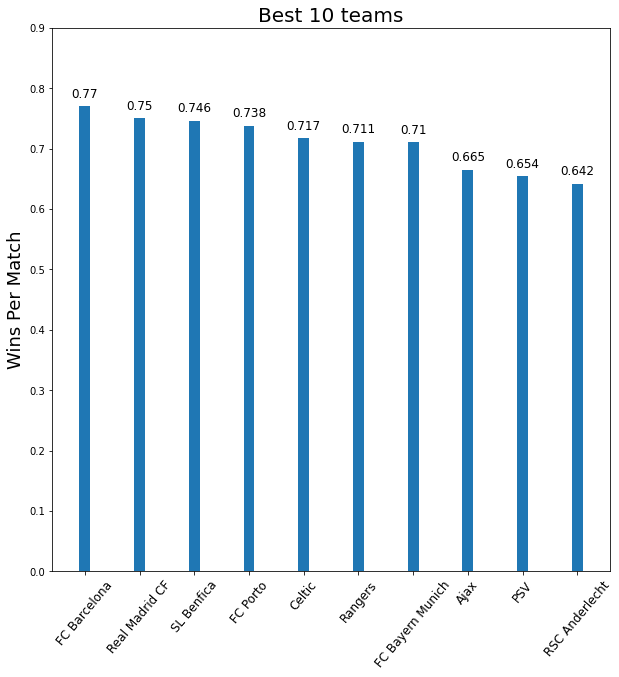

In [168]:


# Best teams with number of wins per match they played.
Best_teams = df.WPM.nlargest(10)

Best_10_Data = TeamData[TeamData['team_api_id'].isin(Best_teams.index)]       # a data frame with the data of all the 10 best teams.


Best10_no_names = []
Best10_no_wins = []
for i in range(len(Best_teams)):
    Best10_no_names.append(TeamData.query(f'team_api_id ==  {Best_teams.index[i]}')['team_long_name'].values[0])
    Best10_no_wins.append(round(Best_teams.values[i], 3))

ide = np.arange(0, len(Best10_no_names) * 5, 5)
plt.rcParams["figure.figsize"] = (10, 10)
plt.bar(ide, Best10_no_wins, width=1)
plt.xticks(ide, Best10_no_names, rotation=50, fontsize=12)
plt.ylabel('Wins Per Match', fontsize=18)
plt.title('Best 10 teams', fontsize=20)
plt.xlim(-3, 48)
plt.ylim(0, 0.9)

for i in range(10):
    plt.text(i*5, Best10_no_wins[i] + 0.01, Best10_no_wins[i] , ha='center', va='bottom', fontsize = 12 )



### 3) What helps the best teams to win? In other words, what sets the best teams apart from the rest?

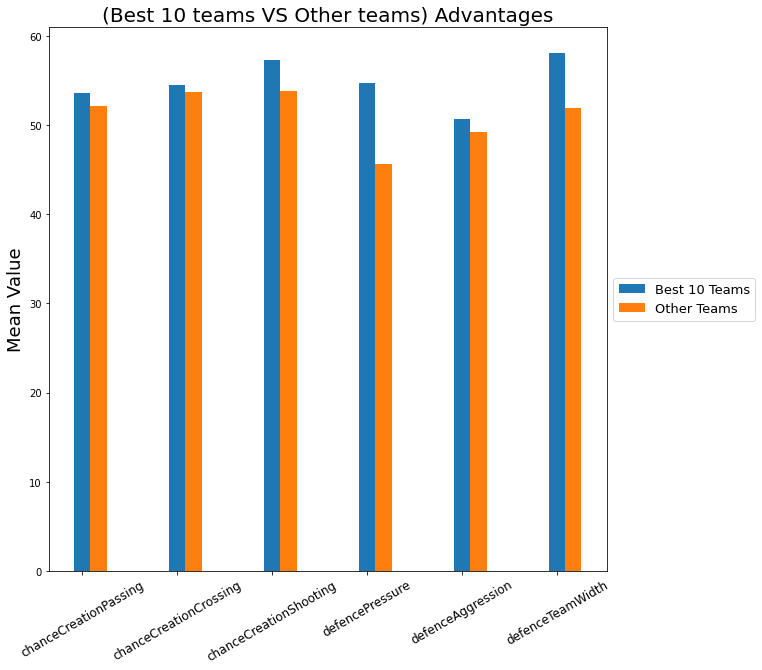

In [169]:
att = ['chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth']
Best_teams_data = TeamData.query(f'team_api_id in {list(Best_teams.index)}')

best_teams = Best_teams_data[att].mean()                                                 # Data of the best 10 teams 
all_teams = TeamData.query(f'team_api_id not in {list(Best_teams.index)}')[att].mean()   # Data of other teams


ide = np.arange(0, 42, 7)
plt.rcParams["figure.figsize"] = (10,10)
plt.bar(ide, best_teams, width=1.2)
plt.bar(ide+1.2, all_teams, width=1.2)
plt.xticks(ide, att, rotation=390, fontsize=12)
plt.ylabel('Mean Value', fontsize=18)
plt.title('(Best 10 teams VS Other teams) Advantages', fontsize=20)
plt.legend(['Best 10 Teams', 'Other Teams'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, prop={'size': 13})


> We notice that **best tams** give more attention than **other teams** to:
> 1. Creation of passing.
> 2. Creation of crossing.
> 3. Shotting.
> 4. Having a good defence in general.


> So, we will take the defence as example and see how the focus on defence from the teams all over the years.

### 4) How teams' interest in defence has changed ?

In [170]:
# checking for the years avilable in our dataset.
Best_10_Data.Year.value_counts()

2010    10
2011    10
2012    10
2013    10
2014    10
2015    10
Name: Year, dtype: int64

Our analysis in this topic will not include 2008, 2009, 2016

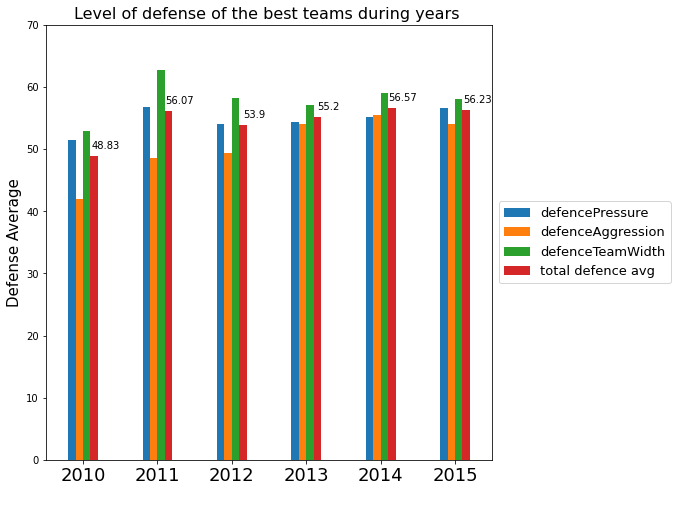

In [171]:
Defence_data = Best_10_Data.groupby('Year').mean()[['defencePressure', 'defenceAggression', 'defenceTeamWidth']]
Defence_data['total defence avg'] = (Defence_data['defencePressure'] + Defence_data['defenceAggression'] + Defence_data['defenceTeamWidth']) / 3
Defence_data

Defence_data.plot.bar(figsize=(8, 8), width=0.4)

plt.ylabel("Defense Average", fontsize=15)
plt.xlabel(' ')
plt.xticks(fontsize=18, rotation='360')
plt.title('Level of defense of the best teams during years ', fontsize=16)
plt.ylim(0, 70)
plt.xlim(-.5, 5.5)
for i in range(6):
    plt.text(i + 0.3, Defence_data.iloc[i]['total defence avg']+.9 , round(Defence_data.iloc[i]['total defence avg'], 2) , ha='center', va='bottom', fontsize = 10 )
    
plt.legend(['defencePressure', 'defenceAggression', 'defenceTeamWidth', 'total defence avg'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, prop={'size': 13})



During 2010, the interest of the top 10 teams in improving the defense line was\
the lowest with an average of 48.83, then this interest began to increase until it reached its peak in 2014 with 56.67.

> ### Now after we covered the questions of leagues and teams let's give attention to the players.

### 5) Who are the best players of each year?

Text(0.5, 1.0, 'Best players in each year')

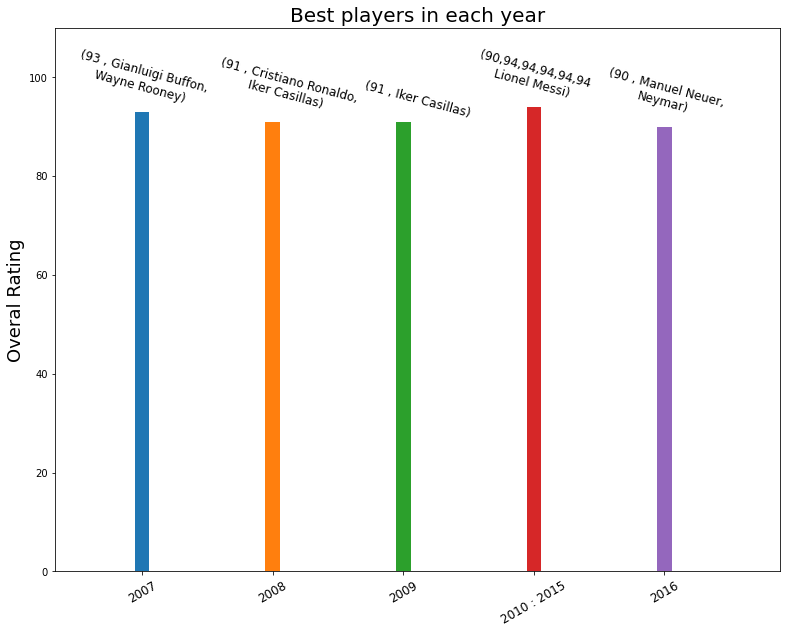

In [172]:
Hello = PlayerData.groupby('Year')['overall_rating'].max()
df = []

for i in range(len(Hello)):
    df.append(PlayerData.query(f'Year == {Hello.index[i]} and overall_rating == {Hello.values[i]}'))

plt.rcParams["figure.figsize"] = (13,10)

plt.bar([3], df[0].overall_rating, width=0.5)
plt.bar([7.5], df[1].overall_rating, width=0.5)
plt.bar([12], df[2].overall_rating, width=0.5)
plt.bar([16.5], df[4].overall_rating, width=0.5)
plt.bar([21], df[9].overall_rating, width=0.5)



plt.text(3 , df[0].overall_rating.iloc[0] + 0.5, '(' + str(int(df[0].overall_rating.iloc[0]))+ ' , ' + df[0].player_name.iloc[0] + ',' + '\n' + df[0].player_name.iloc[1] + ')' , ha='center', va='bottom', fontsize = 12, rotation='-15')
plt.text(8, df[1].overall_rating.iloc[0] + 0.5, '(' + str(int(df[1].overall_rating.iloc[0]))+ ' , ' + df[1].player_name.iloc[0] + ',' +'\n' + df[1].player_name.iloc[1] + ')', ha='center', va='bottom', fontsize = 12, rotation='-15' )
plt.text(12.5 , df[2].overall_rating.iloc[0] + 0.5, '(' + str(int(df[2].overall_rating.iloc[0]))+ ' , ' + df[2].player_name.iloc[0] + ')', ha='center', va='bottom', fontsize = 12, rotation='-15' )

plt.text(16.5, df[4].overall_rating.iloc[0] + 0.5, '(' + 
           str(int(df[3].overall_rating.iloc[0])) + ',' + str(int(df[4].overall_rating.iloc[0])) + ',' +
           str(int(df[5].overall_rating.iloc[0])) + ',' + str(int(df[6].overall_rating.iloc[0])) +',' +
           str(int(df[7].overall_rating.iloc[0])) +',' + str(int(df[8].overall_rating.iloc[0])) +'\n' +
           df[4].player_name.iloc[0] + ')', ha='center', va='bottom', fontsize = 12, rotation='-15' )

plt.text(21, df[9].overall_rating.iloc[0] + 0.5, '(' + str(int(df[9].overall_rating.iloc[0]))+ ' , ' + df[9].player_name.iloc[0] + ',' + '\n' + df[9].player_name.iloc[3] + ')', ha='center', va='bottom', fontsize = 12, rotation='-15' )

plt.xlim(0, 25)
plt.ylim(0, 110)
plt.xticks([3, 7.5, 12, 16.5, 21], ['2007', '2008', '2009', '2010 : 2015', '2016'], rotation=390, fontsize=12)
plt.ylabel('Overal Rating', fontsize=18)
plt.title('Best players in each year', fontsize=20)


We have noticed that Lionel Messi is the most superior player in the rankings over the years .. as he has the maximum \
rank in 2010 - 2011 - 2012 - 2013 - 2014 - 2015

> ### Now let's try to know what make these players be the best players in the Europe !

### 6) What features affects the overall rating of the players?

We will try to find out which features are relevant to the overall rating.

In [ ]:
columns = PlayerData.columns


for column  in columns:
    if column in ['player_name', 'date', 'Year', 'overall_rating']:
        continue
    PlayerData.plot.scatter(x=column, y='overall_rating',s = 0.5,  figsize=(8, 5), title = f'Relationship between overal rating & {column} ')


<a id='conclusions'></a>
## Conclusions

> 1. The number of matches varies from one league to another, but I dealt with it using the mean in my analysis.
>
> 2. The greatest 3 leagues with the most number of goals per year were
> * **Spain LIGA BBVA**
> * **England Premier League**
> * **Italy Serie A.**
>
>
> 3. As i mentioned in point 1, the number of matches differs from league to another so we get the\
Leagues with maximum average goals per game and they are: 
> * **Netherlands Eredivisie**
> * **Switzerland Super League**
> * **Germany 1. Bundesliga.**
>
>
> 4. The best teams which have a great avg goals per match ara:
> 
> * **FC Barcelona**
> * **Real Madrid CF**
> * **SL Benfica**
> * **FC Porto**
> * **Celtic**
> * **Rangers**
> * **FC Bayern Munich**
> * **Ajax','PSV','RSC Anderlecht'**
> 5. The common features of these teams are
> * **Good creation of passing**
> * **Good creation of crossing**
> * **Good shooting**
> * **Having a good defence in general.**
>
>
> 5. From the fifth point, we benefit from an advantage that helps teams win matches, which is a **good defense in general.** \
From the quote: **The best way to attack is to defend**, and analysis has proven that. As the top 10 winning teams care more about defense than other teams.
and this attention increased over the years that reach peek in 2014.
>
>
> 6. The age curve of players is a normal distribution curve, and, the average age of the players is 35 years.
>
> 7. Lionel Messi dominated the list of the best player in Europe for five consecutive years from 2010 to 2015.
>
> 8. Goalkeepers with the highest rating over the years are 
> * **Gianluigi Buffon**
> * **Manuel Neuer**
> * **Iker Casillas**
> 9. The best players have common features, the most important of which are:
> * **potential**
> * **reactions**
> * **short_passing**
> * **ball_control**
> * **vision**
> * **shot_power** 



